##  Task # 5 - To explore Business Analytics
#### **Problem Statement:-
                          Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’
You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\c com\SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.shape

(9994, 13)

In [5]:
data.duplicated().sum()

17

In [6]:
#removing duplicate values
data.drop_duplicates(subset = None, keep = 'first', inplace = True)
data.duplicated().sum()

0

## Data Analysis through Visualiztion

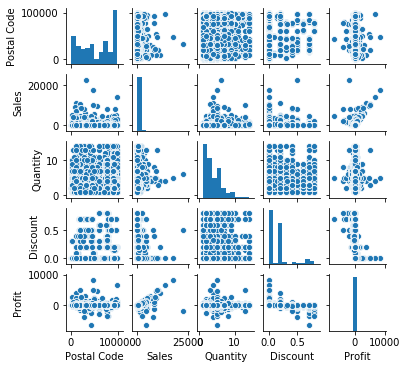

In [7]:
sns.pairplot(data,height=1);

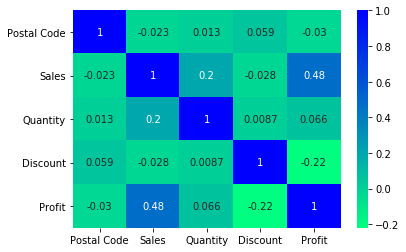

In [10]:
#heat map 
corr = data.corr()
sns.heatmap(corr,cmap = "winter_r", annot = True)
plt.show()

## Data Visualization 

Text(0.5, 0, 'Profit')

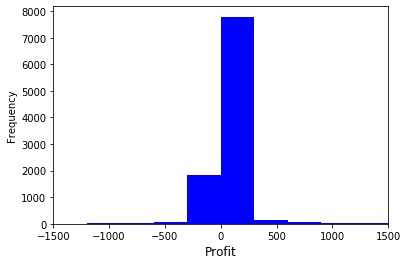

In [12]:
#visualizing profit
data['Profit'].plot.hist(bins=50,color="blue")
plt.xlim(-1500,1500)
plt.xlabel('Profit', fontsize=12)

Text(0.5, 0, 'Sales')

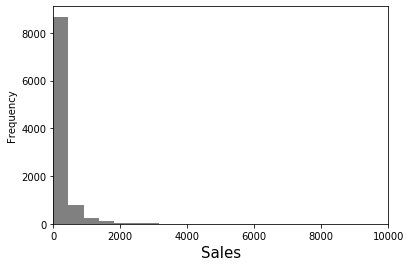

In [13]:
#visualizing sales
data['Sales'].plot.hist(bins=50,color="grey")
plt.xlim(0,10000)
plt.xlabel('Sales', fontsize=15)

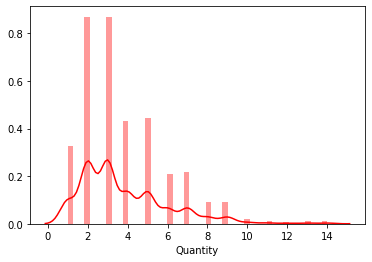

In [15]:
#visualizing Quantity
sns.distplot(data['Quantity'], color= 'red')
plt.show()

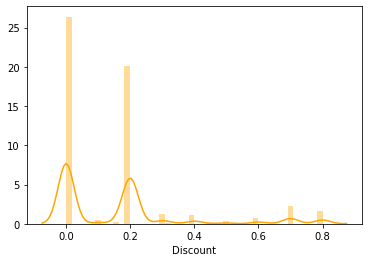

In [17]:
#visualizing duscount
sns.distplot(data['Discount'], color= 'orange')
plt.show()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64


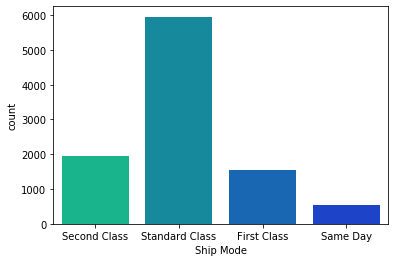

In [21]:
#visualizing Ship mode
print(data['Ship Mode'].value_counts())
sns.countplot(x = data["Ship Mode"],palette="winter_r")
plt.show()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


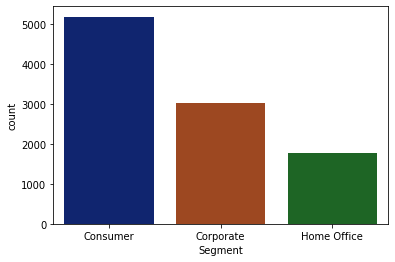

In [22]:
#visualizing Segment
print(data['Segment'].value_counts())
sns.countplot(x = data['Segment'],palette="dark")
plt.show()

United States    9977
Name: Country, dtype: int64


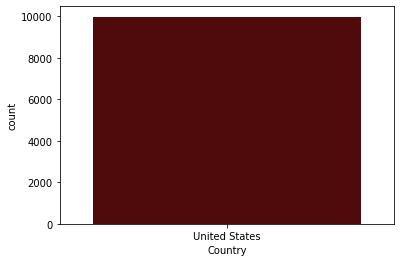

In [24]:
#visualizing Country
print(data['Country'].value_counts())
sns.countplot(x = data['Country'],palette="flag_r")
plt.show()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


Text(0.5, 1.0, 'Percentage of sales in diff Regions of USA')

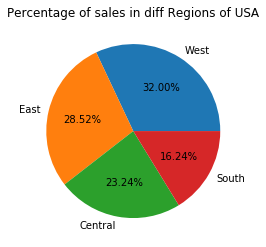

In [26]:
#Visualizing Region
theme = plt.get_cmap('hsv')
print(data['Region'].value_counts())
plt.pie(data['Region'].value_counts(),labels=data['Region'].value_counts().index,autopct='%2.2f%%')
plt.title('Percentage of sales in diff Regions of USA')

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64


Text(0.5, 1.0, 'Percentage of sales for different categories')

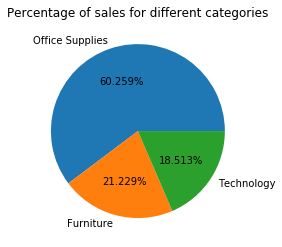

In [27]:
#Visualizing Category
print(data['Category'].value_counts())
plt.pie(data['Category'].value_counts(),labels=data['Category'].value_counts().index,autopct='%3.3f%%')
plt.title('Percentage of sales for different categories')

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


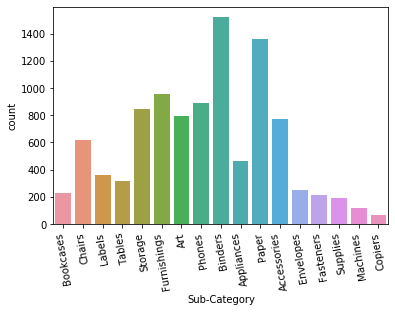

In [29]:
#Visualizing Sub-category
print(data['Sub-Category'].value_counts())
sns.countplot(x = data['Sub-Category'])
plt.xticks(rotation = 100)
plt.show()

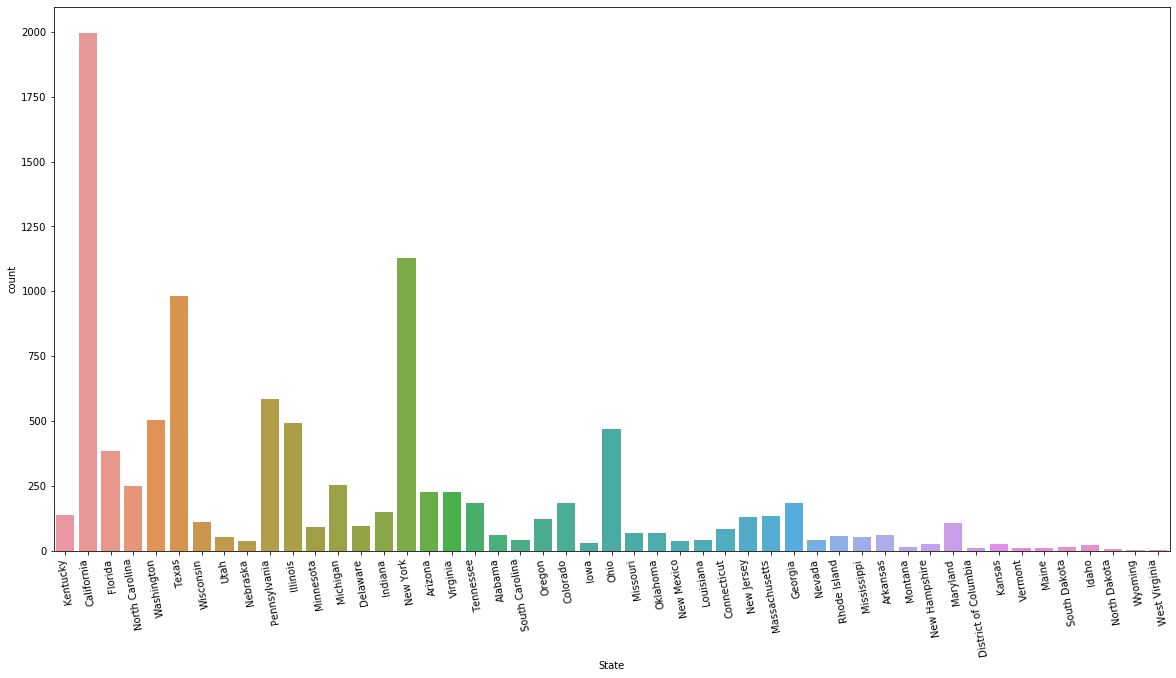

In [30]:
#Visualizing State
plt.figure(figsize=(20,10))
sns.countplot(x = data.State)
plt.xticks(rotation =100)
plt.show()

## Profit, Loss and Sales visualization 

New York City     914
Los Angeles       746
Philadelphia      536
San Francisco     506
Seattle           424
                 ... 
Ontario             1
Jefferson City      1
Hagerstown          1
Elyria              1
La Quinta           1
Name: City, Length: 531, dtype: int64


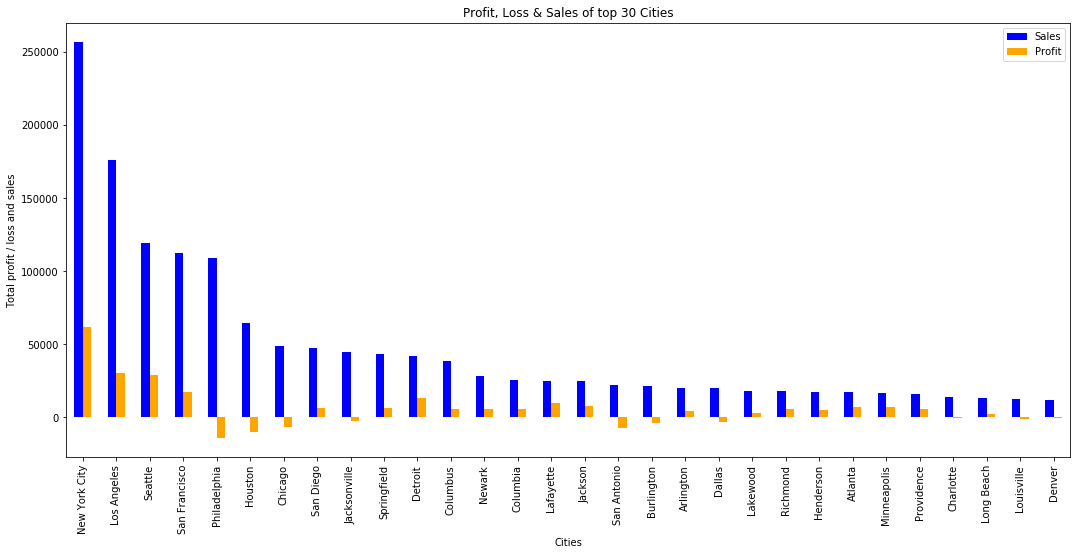

In [31]:
#City wise analysis of Profits and sale
print(data['City'].value_counts())
City = data.groupby("City")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False)
City[:30].plot(kind = "bar", color = ["blue", "orange"],figsize= (18,8))
plt.title("Profit, Loss & Sales of top 30 Cities")
plt.xlabel("Cities")
plt.ylabel("Total profit / loss and sales")
plt.show()

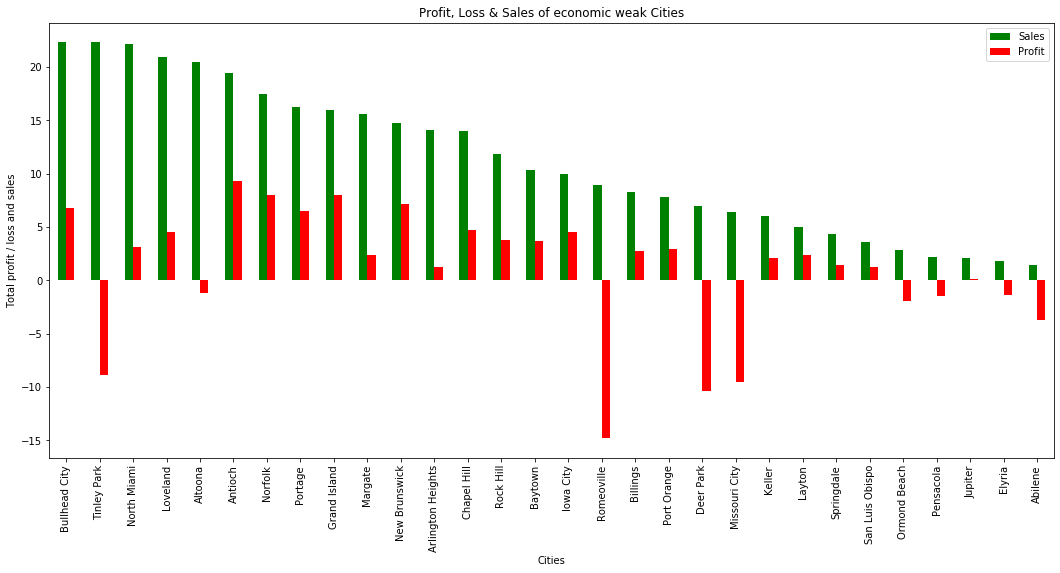

In [32]:
#Profit, Loss & Sales of economic weak Cities
City[-30:].plot(kind = "bar", color = ["green", "red"],figsize= (18,8))
plt.title("Profit, Loss & Sales of economic weak Cities")
plt.xlabel("Cities")
plt.ylabel("Total profit / loss and sales")
plt.show()

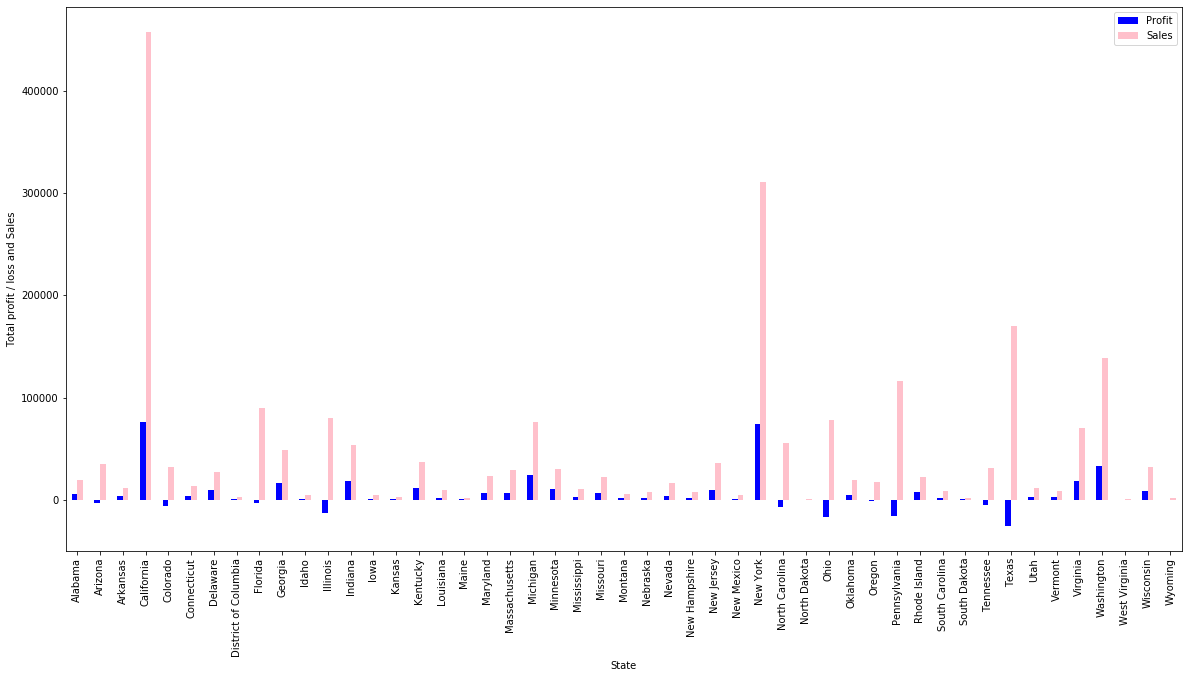

In [33]:
#State wise analysis of Profit and Sales:
data.groupby('State')[['Profit', 'Sales']].sum().plot.bar(color = ["blue", "pink"],figsize= (20,10))
plt.ylabel("Total profit / loss and Sales")
plt.show()

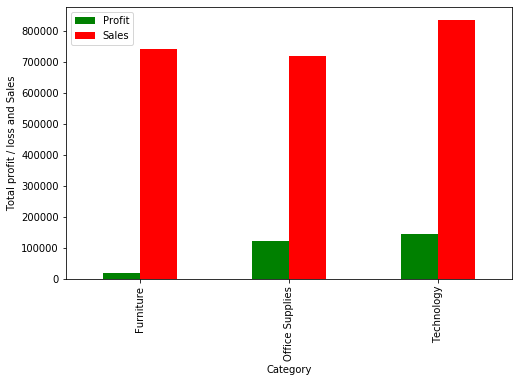

In [34]:
#Category wise analysis of Profit and Sales
data.groupby('Category')[['Profit', 'Sales']].sum().plot.bar(color = ["green", "red"],figsize= (8,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

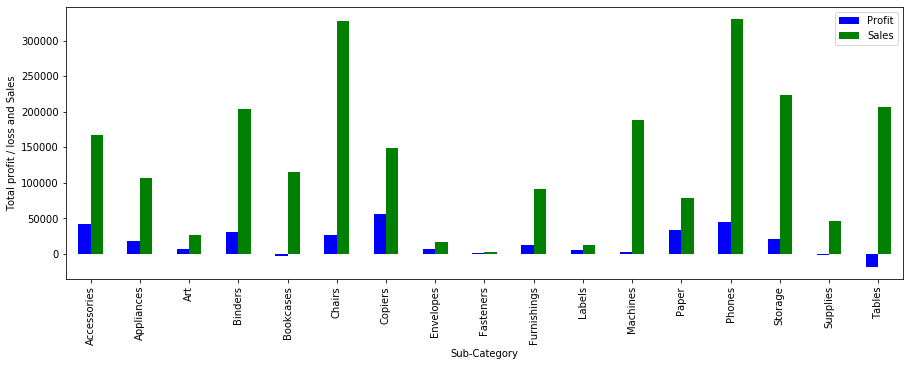

In [35]:
#Sub-Category wise analysis of Profit and Sales
data.groupby('Sub-Category')[['Profit', 'Sales']].sum().plot.bar(color = ["blue", "green"],figsize= (15,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

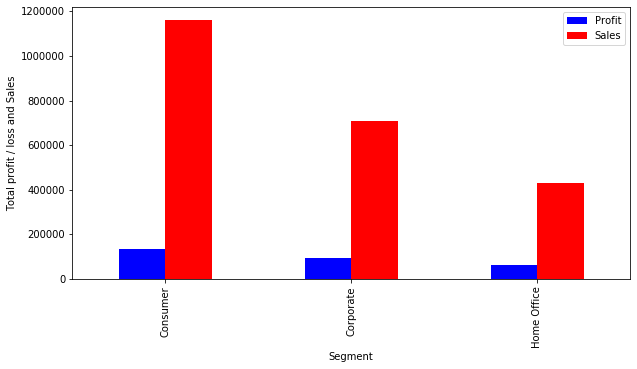

In [36]:
#Segment wise analysis of profit and sales
data.groupby('Segment')[['Profit', 'Sales']].sum().plot.bar(color = ["blue", "red"],figsize= (10,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

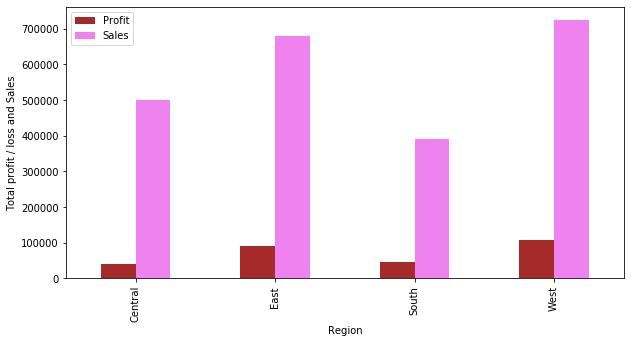

In [37]:
#Region wise analysis of profit and sales
data.groupby('Region')[['Profit', 'Sales']].sum().plot.bar(color = ["brown", "violet"],figsize= (10,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

### Sales and profit are high in West region

## Conclusion:
-Same day shipping mode should be improved

-Sales in south region should be increased

-Technology is the least selling category

-All the subcategories should be given equal attention for increasing sales.

-We should expand in all the states of US

-Sales should be increased in southern regions as presently it has the lowest sales.

-Furniture supplies have low profit relative to its sale. Profit should be maximised in this category.

-States like Ohio and Texas are facing high losses, improvement should be made in such states.

-Profit and Sales are related to each other but the proportion is not very uniforn.Hence we should to work on both sales and profit seperately to increase them.

